## 1. Problem

In [1]:
import numpy
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]
print(n_samples)

17


In [2]:
import matplotlib.pyplot as plt
plt.plot(train_X, train_Y, 'ro', label='Training Data')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## 2. Linear Regression

![](images/reg_error.gif)

In [3]:
import tensorflow as tf

rng = numpy.random
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
pred = tf.add(tf.multiply(X, W), b)

## 3. Mean Squared Error
![](images/mean_squared_error.svg)

In [4]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)

## 4. Gradient Descent
![](images/gradient_descent_demystified.png)
![](images/gredient_decent.png)
![](images/0tirm.png)

In [5]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 5. Train

In [6]:
# Parameters
training_epochs = 1000
display_step = 50

# Start training
sess = tf.Session()

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()
sess.run(init)

# Record learning curve
lc_epoch = []
lc_cost = []

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if epoch == 0 or (epoch + 1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(c), 
              "W=", sess.run(W), "b=", sess.run(b))
        lc_epoch.append(epoch + 1)
        lc_cost.append(c)
        
print("Training Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0001 cost= 4.599255085 W= 0.7543029 b= 0.43527174
Epoch: 0050 cost= 0.087047301 W= 0.3058302 b= 0.39690453
Epoch: 0100 cost= 0.085881993 W= 0.3024856 b= 0.42096525
Epoch: 0150 cost= 0.084851436 W= 0.29933986 b= 0.44359535
Epoch: 0200 cost= 0.083940066 W= 0.29638115 b= 0.4648797
Epoch: 0250 cost= 0.083134115 W= 0.29359847 b= 0.48489857
Epoch: 0300 cost= 0.082421407 W= 0.29098132 b= 0.5037261
Epoch: 0350 cost= 0.081791222 W= 0.2885198 b= 0.5214339
Epoch: 0400 cost= 0.081233911 W= 0.28620458 b= 0.53808933
Epoch: 0450 cost= 0.080741115 W= 0.28402722 b= 0.55375385
Epoch: 0500 cost= 0.080305405 W= 0.2819792 b= 0.5684868
Epoch: 0550 cost= 0.079920135 W= 0.2800529 b= 0.5823441
Epoch: 0600 cost= 0.079579487 W= 0.2782413 b= 0.5953769
Epoch: 0650 cost= 0.079278328 W= 0.27653745 b= 0.6076345
Epoch: 0700 cost= 0.079012059 W= 0.27493492 b= 0.6191628
Epoch: 0750 cost= 0.078776672 W= 0.2734278 b= 0.63000447
Epoch: 0800 cost= 0.078568593 W= 0.2720105 b= 0.6402012
Epoch: 0850 cost= 0.078384653 W=

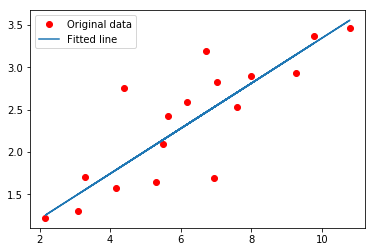

In [7]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()

# 6. Learning Curve

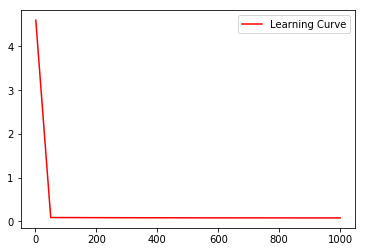

In [10]:
plt.plot(lc_epoch, lc_cost, 'r-', label='Learning Curve')
plt.legend()
plt.show()